# <center> PROJECT SMARTPHONES SALES

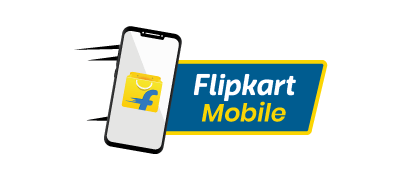

# About Dataset


### Context:
This dataset contains information on a variety of smartphone models. The data is scraped from the e-commerce website flipkart.com and has been cleaned and processed for analysis. I used Pandas and BeautifulSoup libraries to scrape the data. I scraped data from a page 1 to 41 which was the maximum number that I was able to scrape.

### Content:
The dataset contains information on over 800 smartphone models from various brands including Apple, Samsung, Xiaomi and more. The dataset includes the following attributes:

### Attributes -

1.brand: The brand of the smartphone, such as Samsung, Apple, Xiaomi, etc.

2.model: The name and model number of the smartphone, such as iPhone 12, Samsung Galaxy A33, Redmi Note 10, etc.

3.colour: The colour of the smartphone, such as sandy gold, sunrise blue, etc.

4.original_price: The original price of the smartphone in Indian rupees (INR) before any discounts.

5.discounted_price: The discounted price of the smartphone in INR after any discounts or promotions.

6.ratings: The average rating of the smartphone by customers on the Flipkart website, on a scale of 1 to 5 stars.

7.rating count: The number of ratings given by customers on the Flipkart website for the smartphone.

8.reviews: The text reviews given by customers on the Flipkart website for the smartphone.

9.memory: The amount of RAM memory included in the smartphone measured in gigabytes (GB).

10.storage: The amount of internal storage included in the smartphone measured in gigabytes (GB).

11.processor: The type and speed of the processor included in the smartphone, such as Qualcomm Snapdragon 888, Apple A14 Bionic, etc.

12.rear_camera: The number and specifications of the rear cameras included in the smartphone, such as 48 MP + 12 MP + 5 MP, etc.

13.front_camera: The number and specifications of the front camera included in the smartphone, such as 20 MP, etc.

14.display_size: The diagonal size of the smartphone screen measured in centimeters (cm).

15.battery_capacity: The capacity of the smartphone battery measured in milliampere-hours (mAh).

16.battery_type: The type of battery included in the smartphone, such as lithium-ion (Li-Ion), lithium-polymer (Li-Po), etc.

.

## Dataset Link

https://www.kaggle.com/datasets/dnyaneshyeole/flipkart-smartphones-dataset

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
smt=pd.read_csv('./flipkart_smartphones.csv')
smt

,brand,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,processor,rear_camera,front_camera,display_size,battery_capacity,battery_type
0,VIVO,VIVO T1 44W,Starry Sky,19990,14499,4.5,87331,6044,4.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium
1,APPLE,APPLE IPHONE 11,White,48900,47199,4.6,184191,10818,NaN,128.0,A Bionic Chip,12MP + 12MP,12MP,15.49,NaN,NaN
2,VIVO,VIVO T1 44W,Midnight Galaxy,20990,15999,4.4,51365,3750,6.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium
3,XIAOMI,POCO M4 5G,Power Black,15999,11999,4.2,53448,4185,4.0,64.0,Mediatek Dimensity 700,50MP + 2MP,8MP,16.71,5000.0,Lithium Polymer
4,XIAOMI,REDMI 10,Caribbean Green,14999,9299,4.3,187787,12084,4.0,64.0,Qualcomm Snapdragon 680,50MP + 2MP,5MP,17.02,6000.0,Lithium Polymer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,REALME,REALME GT NEO 2,NEO Blue,38999,35999,4.4,4430,628,NaN,256.0,Qualcomm Snapdragon 870,64MP + 8MP + 2MP,16MP,16.81,5000.0,NaN
832,REALME,REALME GT NEO 2,NEO Black,38999,35999,4.4,4430,628,NaN,256.0,Qualcomm Snapdragon 870,64MP + 8MP + 2MP,16MP,16.81,5000.0,NaN
833,REALME,REALME GT NEO 2,NEO Black,34999,31999,4.4,18194,2478,8.0,128.0,Qualcomm Snapdragon 870,64MP + 8MP + 2MP,16MP,16.81,5000.0,NaN
834,REALME,REALME X50 PRO,Rust Red,17999,41999,4.4,8689,1232,8.0,128.0,NaN,64MP + 12MP + 8MP + 2MP,32MP + 8MP Dual,16.36,4200.0,NaN


In [3]:
smt.shape

(836, 16)

In [4]:
smt.describe().T

,count,mean,std,min,25%,50%,75%,max
original_price,836.0,26112.848086,23781.117479,4899.00,13999.00,17999.00,25999.00,159900.00
discounted_price,836.0,21532.468900,21363.273113,3599.00,9999.00,14999.00,22992.25,152999.00
ratings,836.0,4.272488,0.284083,0.00,4.20,4.30,4.40,4.70
rating_count,836.0,41696.120813,90841.753404,0.00,922.75,5917.50,39955.00,1171704.00
reviews,836.0,3144.740431,7524.617982,0.00,78.00,514.00,3314.00,122453.00
memory,757.0,5.225892,2.007385,1.00,4.00,6.00,6.00,8.00
storage,820.0,108.458537,69.174406,8.00,64.00,128.00,128.00,512.00
display_size,836.0,16.525179,0.682189,10.16,16.51,16.66,16.76,17.78
battery_capacity,778.0,4950.931877,502.058888,1600.00,5000.00,5000.00,5000.00,7000.00


In [5]:
smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             836 non-null    object 
 1   model             836 non-null    object 
 2   colour            831 non-null    object 
 3   original_price    836 non-null    int64  
 4   discounted_price  836 non-null    int64  
 5   ratings           836 non-null    float64
 6   rating_count      836 non-null    int64  
 7   reviews           836 non-null    int64  
 8   memory            757 non-null    float64
 9   storage           820 non-null    float64
 10  processor         698 non-null    object 
 11  rear_camera       836 non-null    object 
 12  front_camera      707 non-null    object 
 13  display_size      836 non-null    float64
 14  battery_capacity  778 non-null    float64
 15  battery_type      477 non-null    object 
dtypes: float64(5), int64(4), object(7)
memory us

In [6]:
smt.isnull().mean()*100

brand                0.000000
model                0.000000
colour               0.598086
original_price       0.000000
discounted_price     0.000000
ratings              0.000000
rating_count         0.000000
reviews              0.000000
memory               9.449761
storage              1.913876
processor           16.507177
rear_camera          0.000000
front_camera        15.430622
display_size         0.000000
battery_capacity     6.937799
battery_type        42.942584
dtype: float64

### Imputing the missing values

In [7]:
smt.battery_type.value_counts()

Lithium            198
Lithium Ion        165
Lithium Polymer    114
Name: battery_type, dtype: int64

In [8]:
smt.battery_type.fillna('Lithium', inplace=True)

In [9]:
smt.front_camera.value_counts()

 16MP                227
 8MP                 162
 5MP                 138
 12MP                 62
 13MP                 33
 32MP                 27
 20MP                 11
 2MP                  10
 10MP                  6
 16MP + 16MP Dual      4
 44MP                  4
 50MP                  3
 60 MP with OIS        3
 32MP + 8MP Dual       3
 32MP + 2MP Dual       2
 60MP                  2
 10.8MP                2
 20MP + 2MP Dual       2
 16MP + 2MP Dual       1
 8MP + 2MP Dual        1
 8MP + 8MP Dual        1
 50MP + 8MP Dual       1
 16MP + 8MP Dual       1
 16MP Dual             1
Name: front_camera, dtype: int64

In [10]:
smt.front_camera.fillna('16MP',inplace=True)

In [11]:
smt.processor.value_counts()

Qualcomm Snapdragon 680       40
A Bionic Chip,  Core          31
Mediatek Helio P35            22
Qualcomm Snapdragon 695 5G    20
Unisoc T612                   18
                              ..
Mediatek MT6769 Helio G70      1
Helio A22                      1
Turbo Snapdragon 695           1
Dimensity 920 5G               1
Helio A25                      1
Name: processor, Length: 131, dtype: int64

In [12]:
smt.processor.fillna('Qualcomm Snapdragon 680',inplace=True)

In [13]:
smt.battery_capacity.value_counts()

5000.0    560
6000.0     63
4500.0     42
4000.0     17
4700.0     13
4230.0     10
3000.0      7
4250.0      7
5020.0      6
4980.0      5
4020.0      4
4600.0      3
3700.0      3
3020.0      3
4200.0      3
7000.0      3
5080.0      2
3300.0      2
4400.0      2
4050.0      2
4800.0      2
4310.0      2
4610.0      2
4410.0      2
4300.0      2
4270.0      2
5160.0      1
4520.0      1
5050.0      1
5200.0      1
1600.0      1
4060.0      1
5065.0      1
3900.0      1
2400.0      1
Name: battery_capacity, dtype: int64

In [14]:
smt.battery_capacity.fillna('5000.0',inplace=True)

In [15]:
smt.memory.value_counts()

4.0    228
6.0    203
8.0    186
2.0     72
3.0     63
1.0      5
Name: memory, dtype: int64

In [16]:
smt.memory.fillna('4.0',inplace=True)

In [17]:
smt.storage.value_counts()

128.0    397
64.0     241
32.0     105
256.0     59
512.0      8
16.0       7
8.0        3
Name: storage, dtype: int64

In [18]:
smt.storage.fillna('128.0',inplace=True)

In [19]:
smt.colour.value_counts()

Black                  22
Blue                   18
Yellow                 15
Midnight Black         14
                       11
                       ..
Orange Shimmer          1
Black Engine            1
Dark Nova               1
Crystal Violet          1
Two Shades of Black     1
Name: colour, Length: 375, dtype: int64

In [20]:
smt.colour.fillna('Black',inplace=True)

In [21]:
smt.isnull().mean()*100

brand               0.0
model               0.0
colour              0.0
original_price      0.0
discounted_price    0.0
ratings             0.0
rating_count        0.0
reviews             0.0
memory              0.0
storage             0.0
processor           0.0
rear_camera         0.0
front_camera        0.0
display_size        0.0
battery_capacity    0.0
battery_type        0.0
dtype: float64

## Remove Duplicates

In [22]:
smt.drop_duplicates(inplace=True)

In [23]:
smt.duplicated().sum()

0

## Univariate analysis;

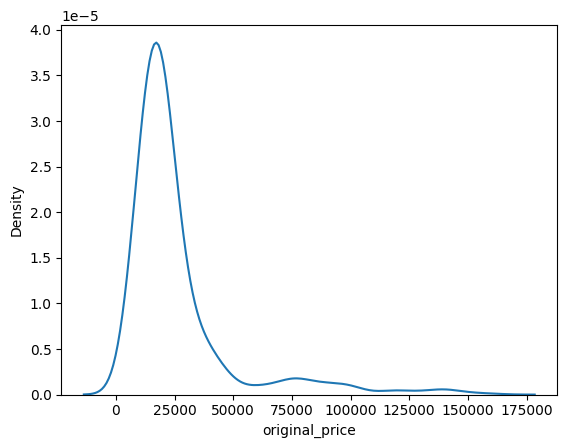

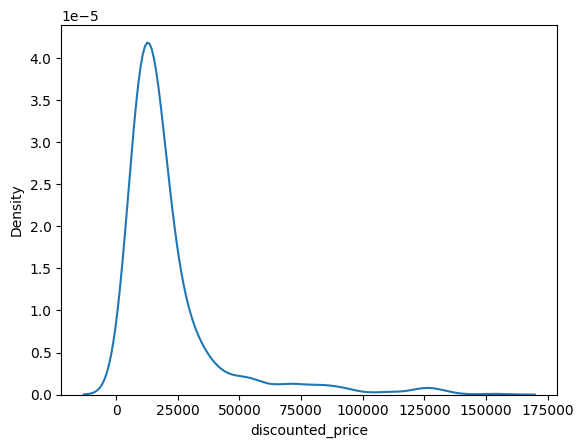

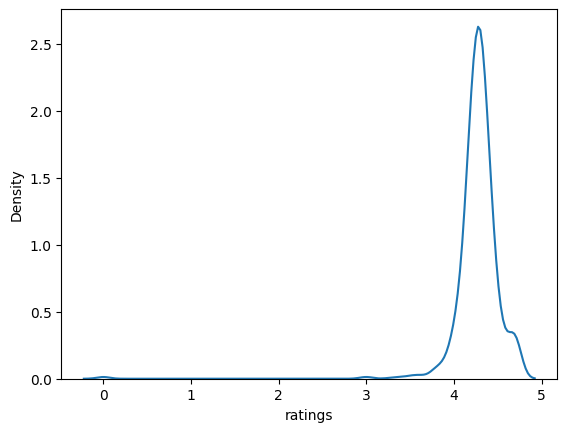

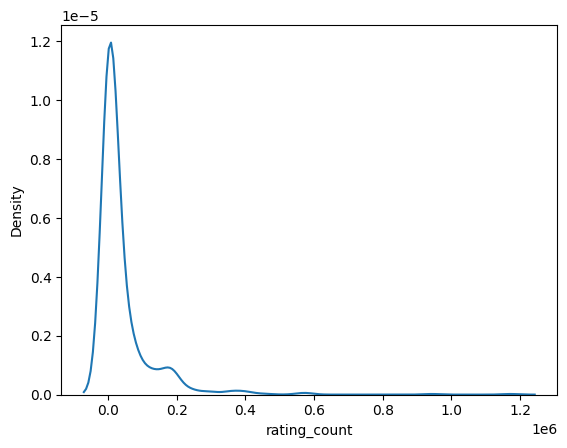

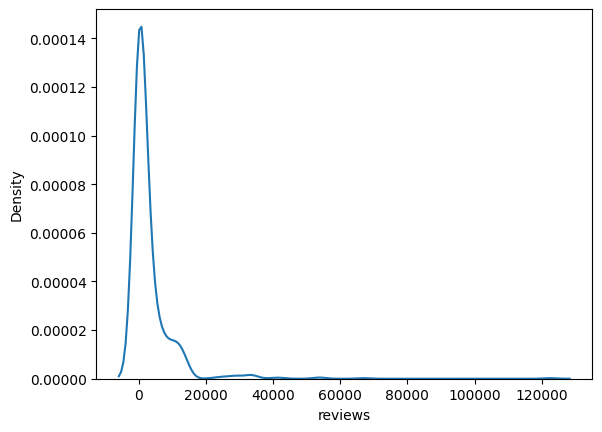

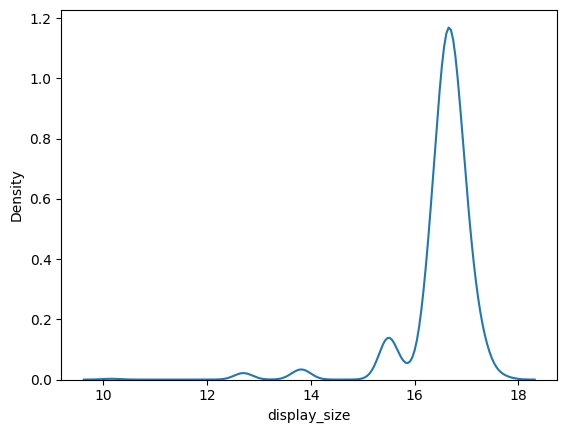

In [24]:
for i in smt.columns:
    if smt[i].dtype!="object":
        sns.kdeplot(x=smt[i])
        plt.show()

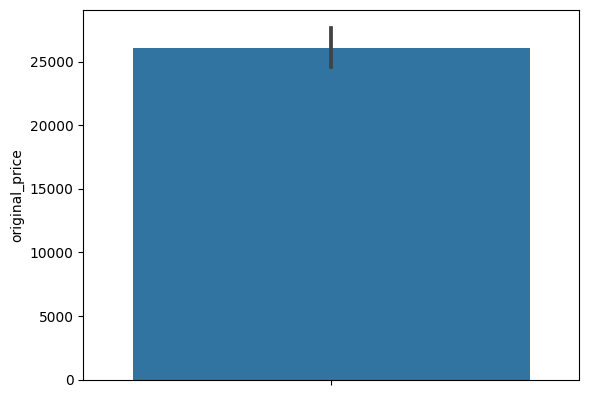

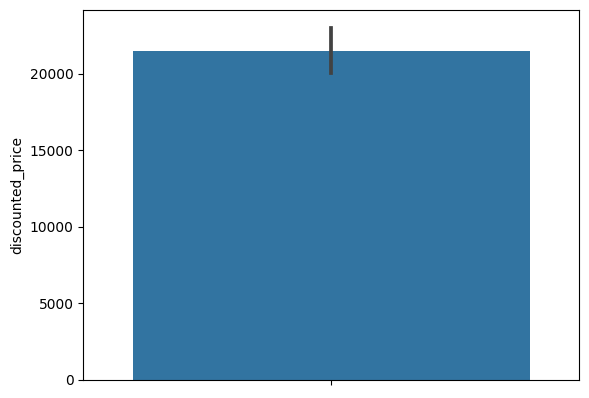

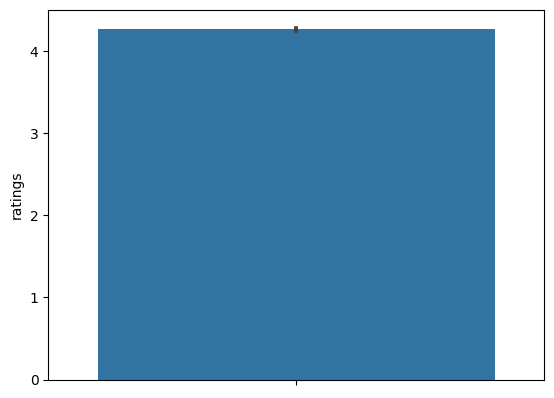

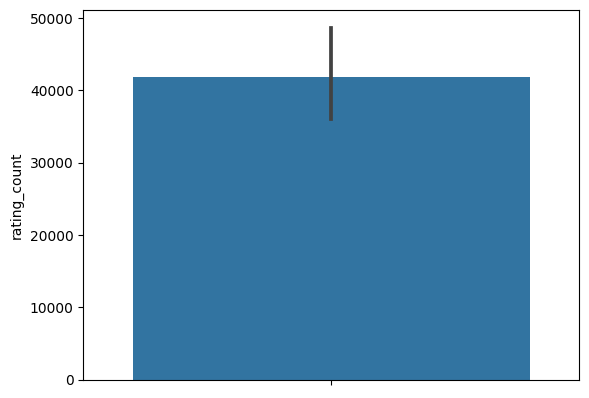

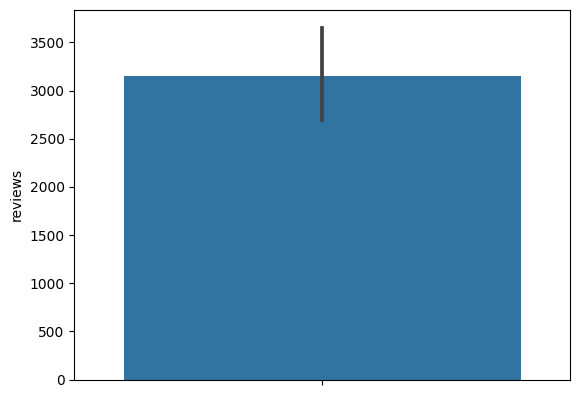

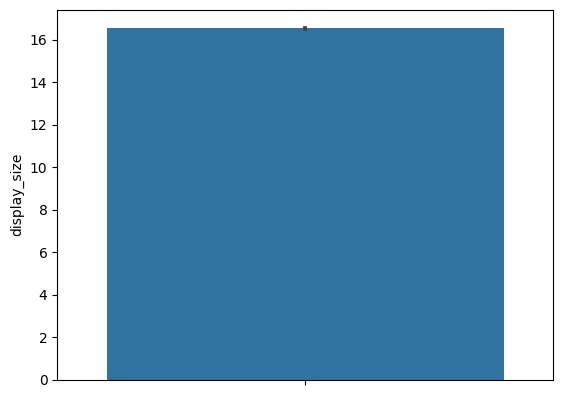

In [25]:
for i in smt.columns:
    if smt[i].dtype!="object":
        sns.barplot(y=smt[i])
        plt.show()

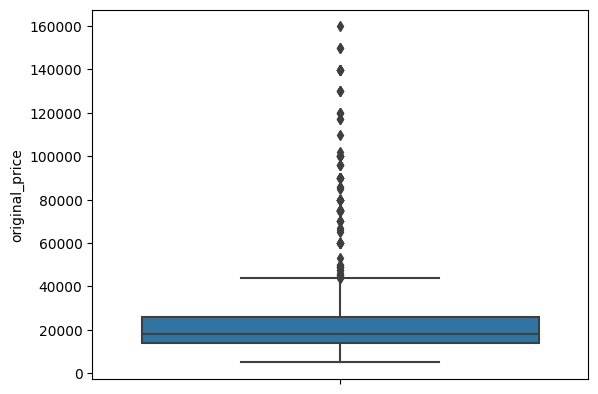

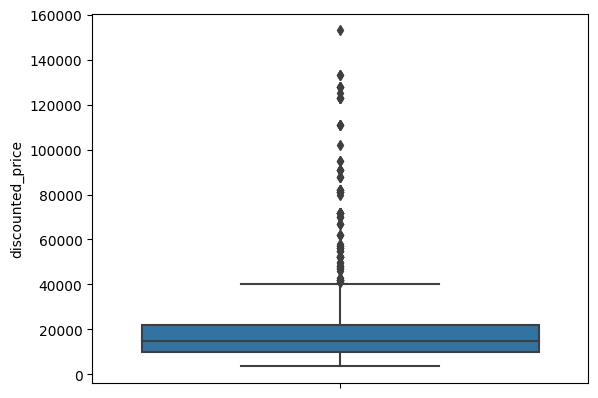

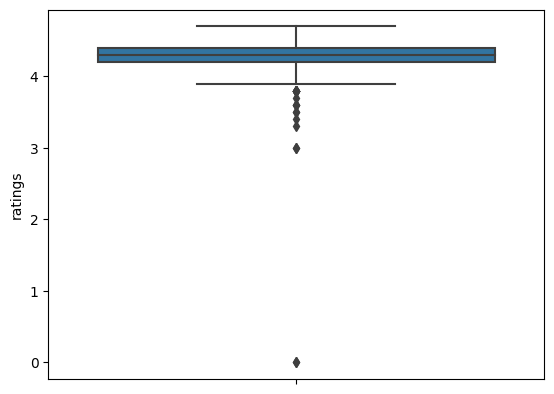

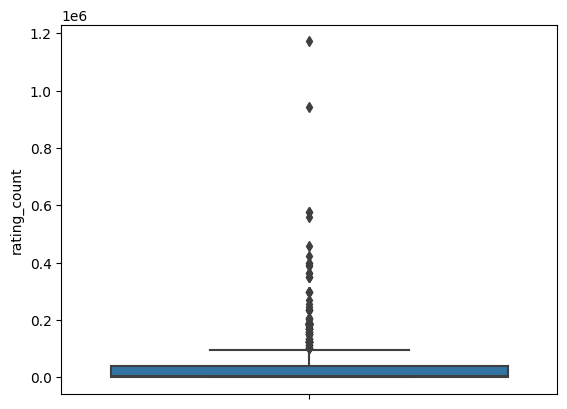

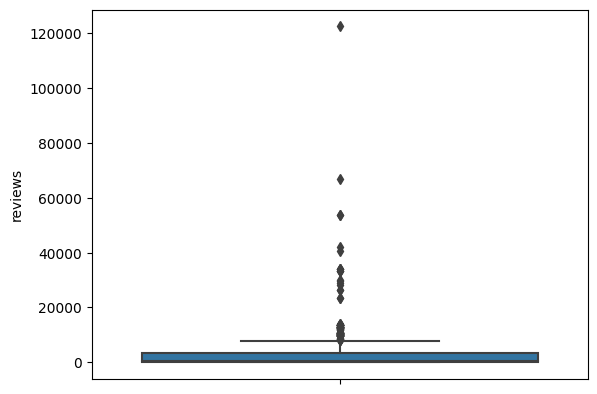

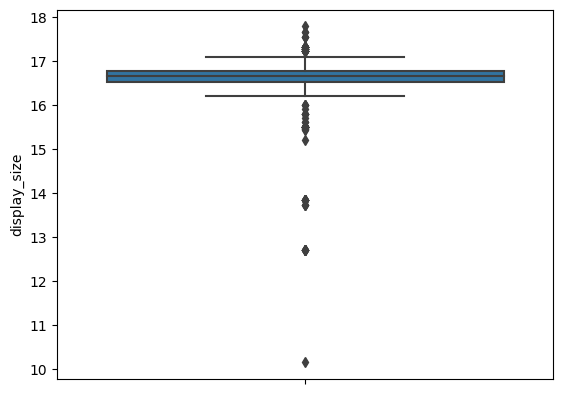

In [26]:
for i in smt.columns:
    if smt[i].dtype!="object":
        sns.boxplot(y=smt[i])
        plt.show()

## Multi Variante Analysis

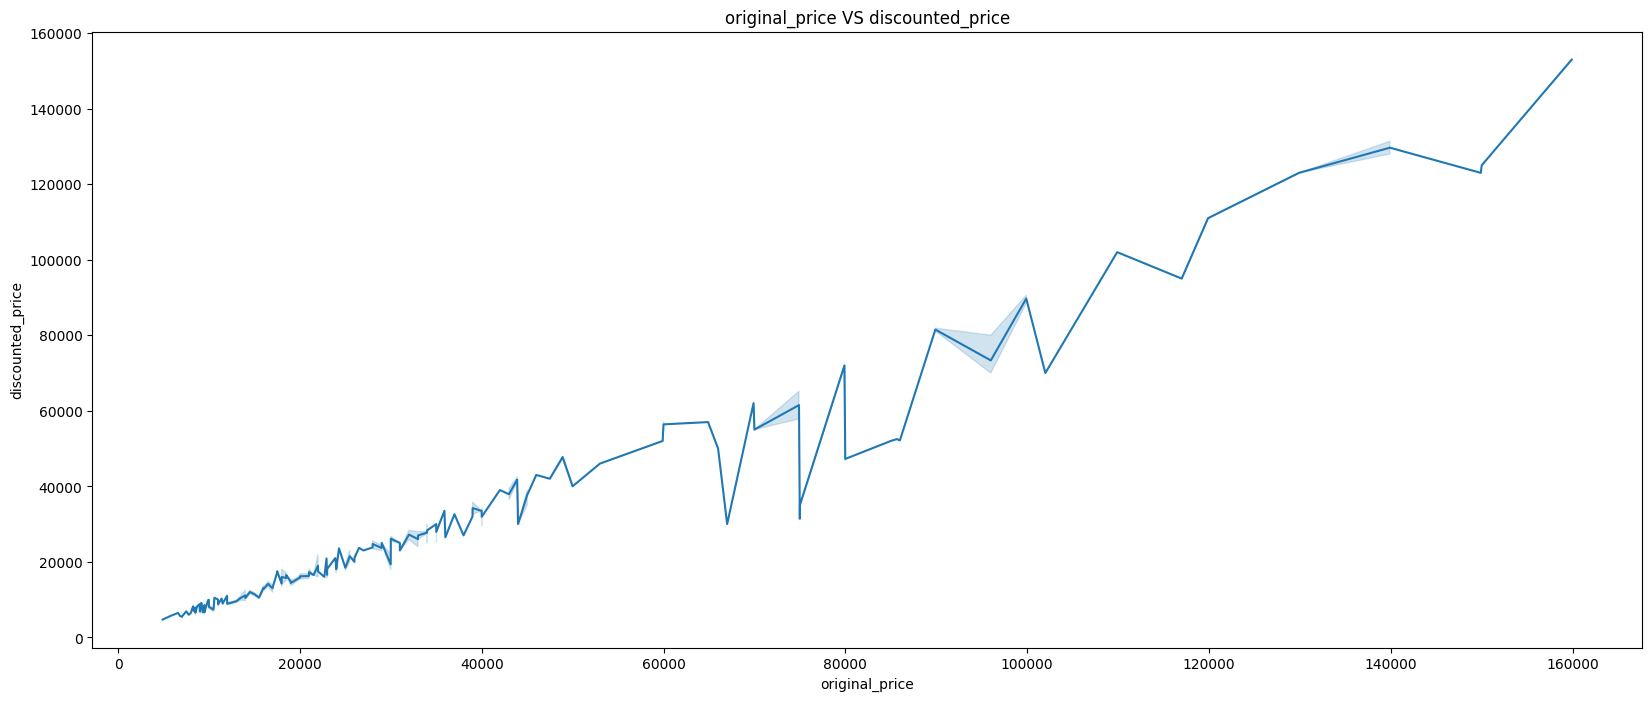

In [29]:
plt.figure(figsize=(20,8))
plt.title('original_price VS discounted_price')
sns.lineplot(x='original_price',y='discounted_price',data=smt);

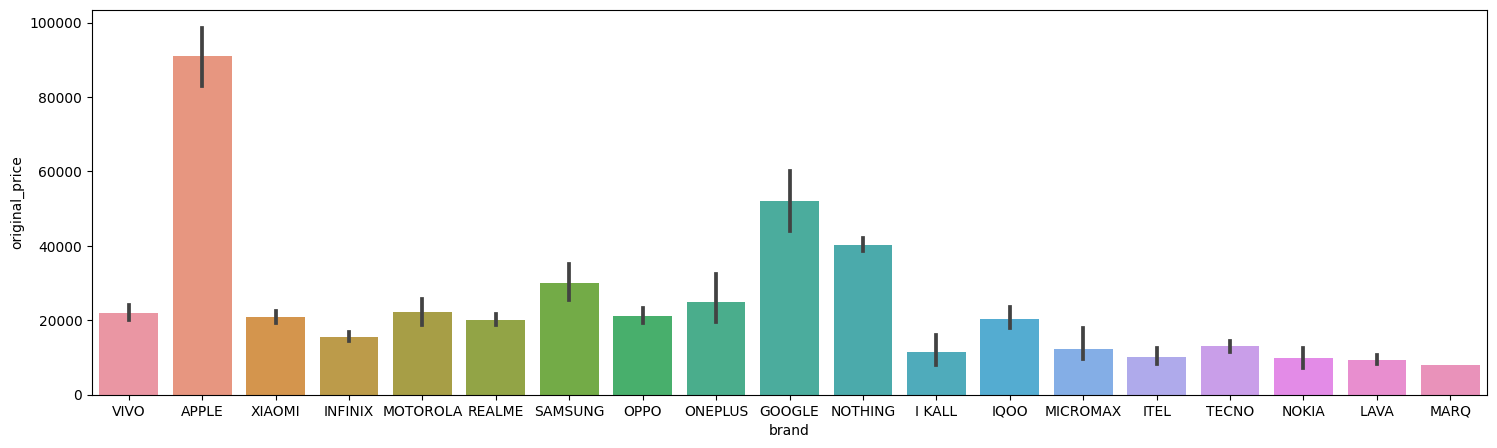

In [36]:

plt.figure(figsize=(18,5))
sns.barplot(x='brand' , y= 'original_price', data=smt);

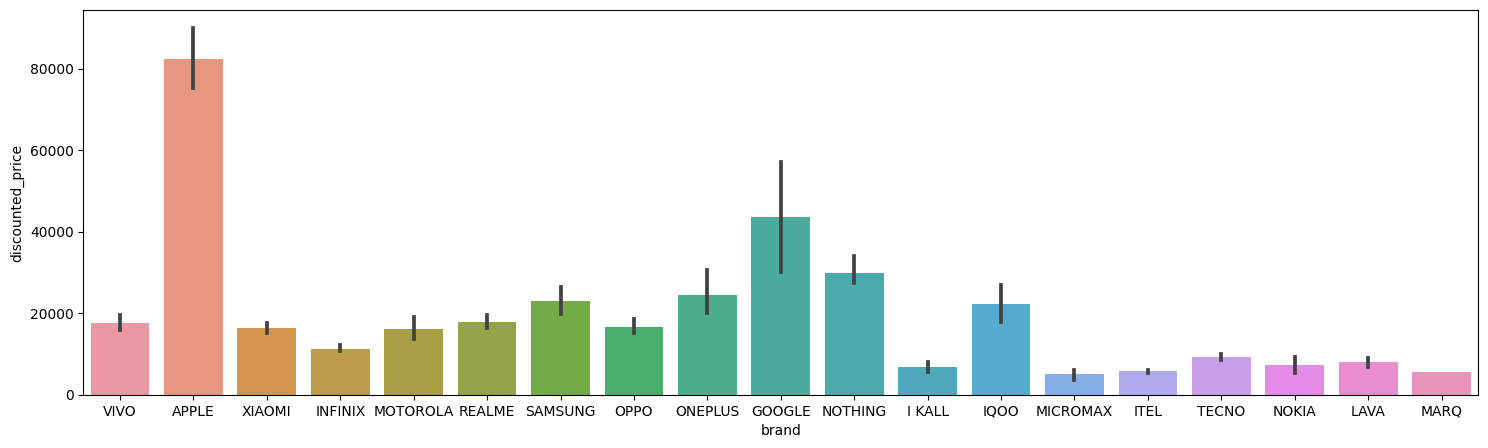

In [37]:
plt.figure(figsize=(18,5))
sns.barplot(x='brand' , y= 'discounted_price', data=smt);

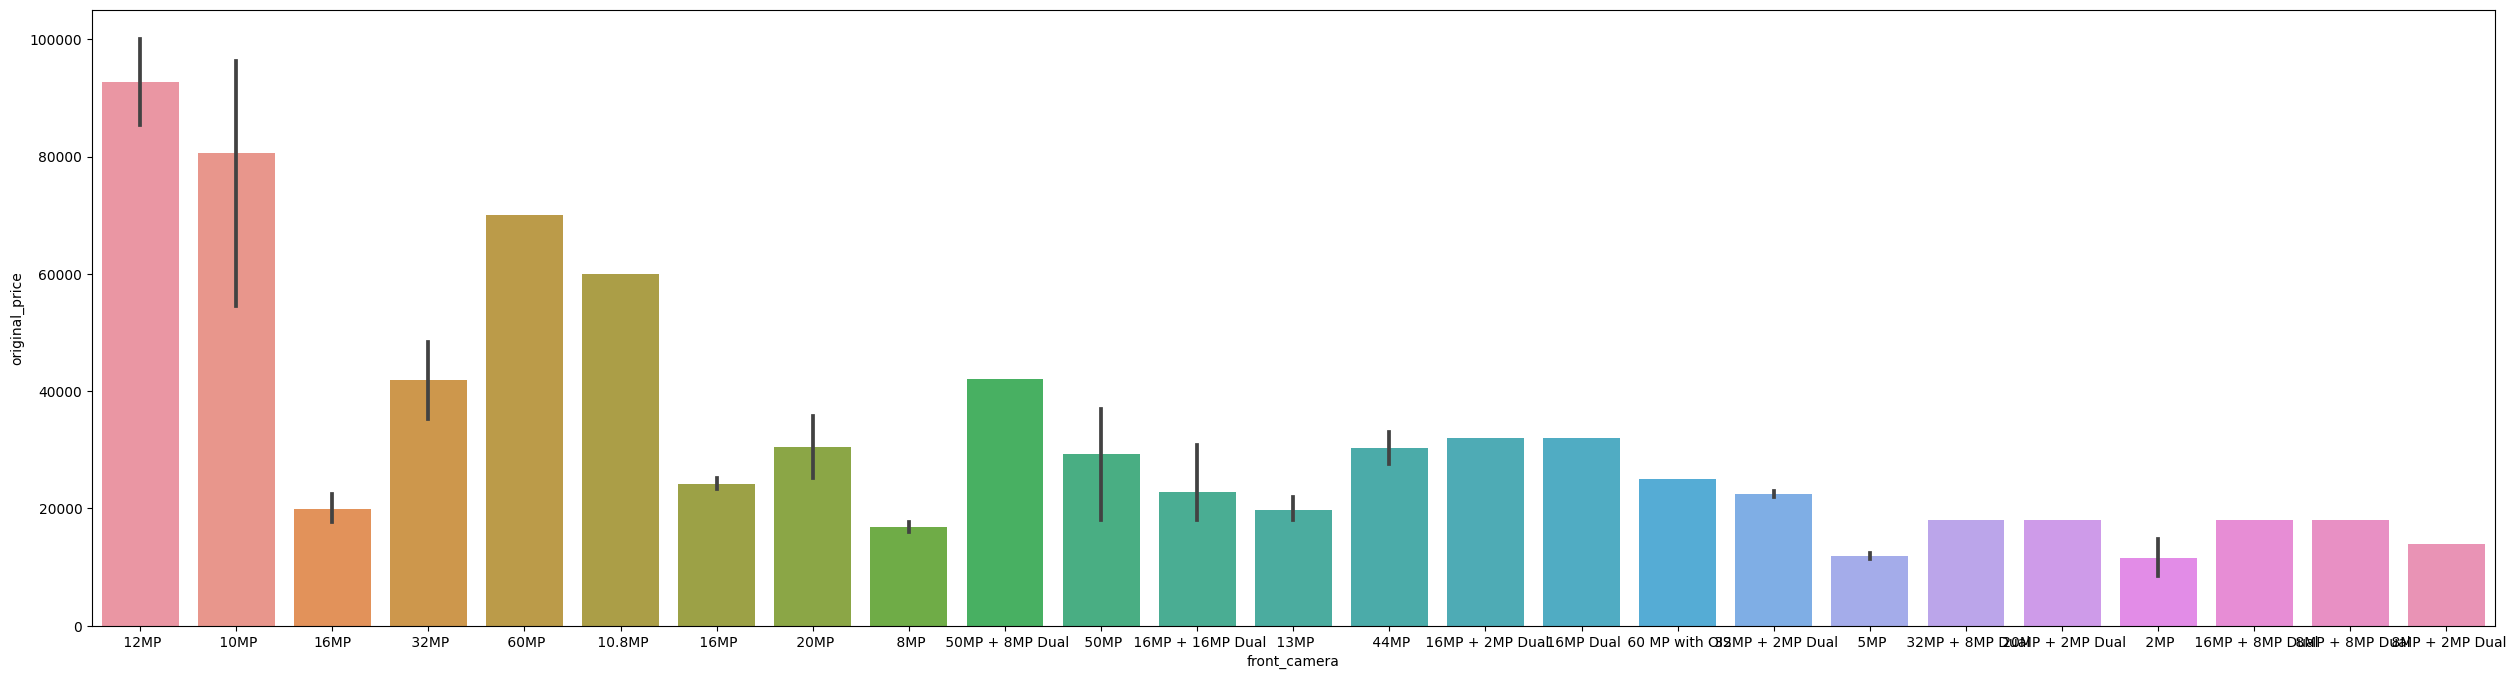

In [46]:
plt.figure(figsize=(31,8))
sns.barplot(x='front_camera' , y= 'original_price', data=smt.sort_values(by='original_price', ascending=False));

## Treating Outliers

In [47]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [48]:
for column in smt.columns:
    if smt[column].dtype!='object':
        UL,LL=outlier_limit(smt[column])
        smt[column]=np.where((smt[column]>UL)|(smt[column]<LL),np.nan,smt[column])

In [49]:
smt.dropna(inplace=True)

## Label encording the catagorical columns

In [50]:
le=LabelEncoder()

In [51]:
col=['brand','model','colour','processor','battery_type','rear_camera']
le=LabelEncoder()
smt[col]=smt[col].apply(le.fit_transform)

In [52]:
smt['front_camera']=smt['front_camera'].str.replace('MP','')

In [53]:
smt['front_camera']=smt['front_camera'].str.replace('Dual','')

In [54]:
smt

,brand,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,processor,rear_camera,front_camera,display_size,battery_capacity,battery_type
0,13,184,258,19990.0,14499.0,4.5,87331.0,6044.0,4.0,128.0,59,41,16,16.36,5000.0,0
2,13,184,163,20990.0,15999.0,4.4,51365.0,3750.0,6.0,128.0,59,41,16,16.36,5000.0,0
3,14,80,204,15999.0,11999.0,4.2,53448.0,4185.0,4.0,64.0,29,39,8,16.71,5000.0,2
5,14,80,40,15999.0,11999.0,4.2,53448.0,4185.0,4.0,64.0,29,39,8,16.71,5000.0,2
7,14,80,288,15999.0,11999.0,4.2,53448.0,4185.0,4.0,64.0,29,39,8,16.71,5000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,14,138,97,22999.0,20390.0,4.3,16833.0,1271.0,6.0,128.0,66,1,16,16.94,5020.0,0
829,12,176,245,8999.0,8490.0,4.2,1487.0,89.0,2.0,32.0,6,21,8,16.56,6000.0,0
831,10,112,176,38999.0,35999.0,4.4,4430.0,628.0,4.0,256.0,73,66,16,16.81,5000.0,0
832,10,112,175,38999.0,35999.0,4.4,4430.0,628.0,4.0,256.0,73,66,16,16.81,5000.0,0


In [55]:
smt['front_camera'].unique()

array([' 16', ' 8', ' 5', ' 13', '16', ' 32', ' 16 + 16 ',
       ' 60  with OIS', ' 44', ' 8 + 2 ', ' 16 + 2 ', ' 20', ' 32 + 2 ',
       ' 8 + 8 ', ' 50 + 8 ', ' 50', ' 16 + 8 ', ' 16 ', ' 20 + 2 '],
      dtype=object)

In [56]:
smt['front_camera'].replace({' 16':16, ' 12':12, ' 8':8, ' 5':5, ' 13':13, '16':16, ' 32':32, ' 16 + 16 ':32,
       ' 60  with OIS':60, ' 44':44, ' 10.8':10.8, ' 8 + 2 ':10, ' 16 + 2 ':18, ' 20':20,
       ' 10':10, ' 32 + 2 ':34, ' 2':2, ' 60':60, ' 8 + 8 ':16, ' 50 + 8 ':58, ' 50':50,
       ' 16 + 8 ':24, ' 16 ':16, ' 20 + 2 ':22, ' 32 + 8 ':40}, inplace=True)

In [57]:
smt.memory.unique()

array([4.0, 6.0, 8.0, 3.0, 2.0, '4.0'], dtype=object)

In [58]:
smt['memory']=smt['memory'].astype(float)

In [59]:
smt['storage']=smt['storage'].astype(float)

In [60]:
smt['battery_capacity']=smt['battery_capacity'].astype(float)

In [61]:
smt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 833
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             582 non-null    int32  
 1   model             582 non-null    int32  
 2   colour            582 non-null    int32  
 3   original_price    582 non-null    float64
 4   discounted_price  582 non-null    float64
 5   ratings           582 non-null    float64
 6   rating_count      582 non-null    float64
 7   reviews           582 non-null    float64
 8   memory            582 non-null    float64
 9   storage           582 non-null    float64
 10  processor         582 non-null    int32  
 11  rear_camera       582 non-null    int32  
 12  front_camera      582 non-null    int64  
 13  display_size      582 non-null    float64
 14  battery_capacity  582 non-null    float64
 15  battery_type      582 non-null    int32  
dtypes: float64(9), int32(6), int64(1)
memory usa

## Checking Correlation

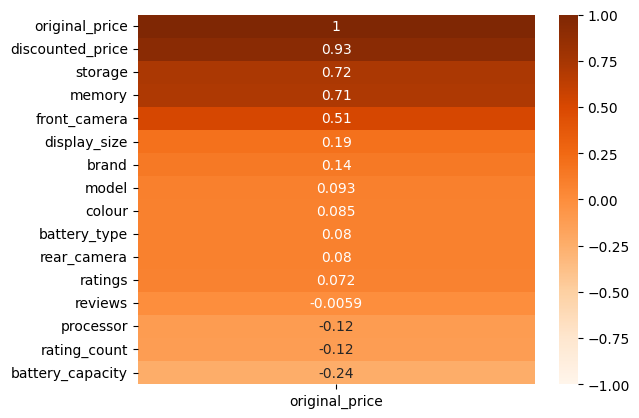

In [62]:
sns.heatmap(smt.corr()[["original_price"]].sort_values(by="original_price", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Oranges");

## Lets take only the columns with good correlation with the target

In [63]:
x= smt [[ 'memory', 'ratings', 'storage', 'discounted_price']].values

In [64]:
y = smt [['original_price']].values

## Feature Scaling

In [65]:
rs = RobustScaler()

In [66]:
x = rs.fit_transform(x)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## model buliding

In [68]:
models={
    'LinearRegression':LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [69]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with LinearRegression
r2score: 86.34292217128775
training_score: 86.56168575069385
testing_score: 86.34292217128775
mae: 2075.639824518596
mse: 9694882.416578284
rmse_test: 3113.6606135830352
****************************************************************************************************
model trained with Ridge
r2score: 86.34200510039996
training_score: 86.55920273725583
testing_score: 86.34200510039996
mae: 2079.0335213931517
mse: 9695533.426592022
rmse_test: 3113.7651527679513
****************************************************************************************************
model trained with LinearSVR
r2score: -565.8125724406156
training_score: -606.2332754506303
testing_score: -565.8125724406156
mae: 19992.929161785556
mse: 472646834.2825523
rmse_test: 21740.44236630323
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score: 80.59272882148747
training_score: 99.543422

In [70]:
model = RandomForestRegressor()

In [71]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
y_pred = model.predict(x)

In [73]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [74]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,19990.0,19096.756000
1,20990.0,19375.752000
2,15999.0,16483.594704
3,15999.0,16483.594704
4,15999.0,16483.594704


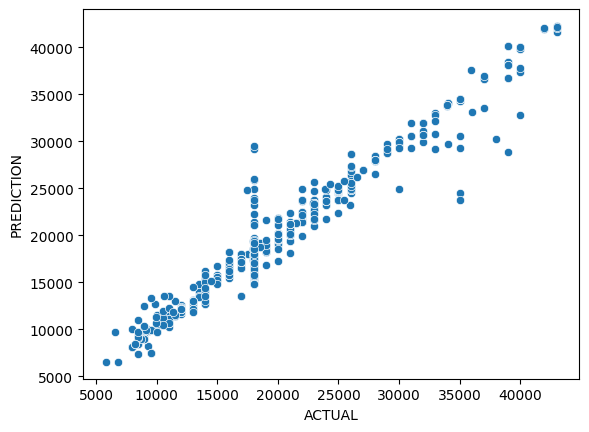

In [75]:
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");